## Aggregated Residual Transformations for Deep Neural Networks

## Abstract
ResNext는 기존의 모듈기반의 Image Classification 모델과 같이 모듈을 반복적으로 쌓는 구조를 갖는다.

그러나, ResNext는 기존의 모델에서 필수적인 요소로 여겨지던</br>
"Width"와 "Depth"에 "Cardinality"라는 요소를 도입하였다.

Cardinality를 증가시키는 것이 width나 depth를 증가시키는 것보다 성능 개선에 훨씬 효과적이라고 한다.

### cardinality?
카디널리티(Cardinality)는 특정 데이터 집합의 유니크(Unique)한 값의 개수이다.</br>
즉, 중복도가 ‘낮으면’ 카디널리티가 ‘높다’고 표현한다.</br>
반대로 중복도가 ‘높으면’ 카디널리티가 ‘낮다’고 표현한다.</br>

ex) 주민등록번호, 이름 두개의 컬럼이 있는 테이블</br>
-> 주민등록번호 : 완전 유니크, 이름 : 가끔 동명이인 발생</br>
--> 주민등록번호의 카디널리티(Cardinality)가 높다</br>


#### ResNext에서 말하는 Cardinality?
각 레이어에서 '병렬 경로(branch)'를 만들어서 이게 곧 Cardinality라 표현함



## 1. Introduction

기존 논문인 VGG, Inception을 비판
1) VGG : 같은 형태의 블록을 쌓음 -> Depth가 늘어남, 이 아이디어까지만 좋음 -> 전체적으로 매우 복잡</br>
2) Inception : 기본 특성이 `Split` -> `Transform` -> `Merge`로 되어 있음</br>
-> 입력을 1x1 conv로 분할함</br>
-> 그 후 특정 필터(1x3, 3x3, 1x7...)등으로 변환됨</br>
-> 다시 병합하는 과정을 거침</br>
이러한 Inception은 필터 수, 커널 사이즈 등 고려할게 많음</br>


논문이 제안하는 바 : VGG/ResNet에서 사용한 계층의 반복전략은 차용, 동시에 카디널리티(cardinality)방법을 도입하여</br>
쉽고, 확장 가능한 split-transform-merge 전략을 제안</br>

-> 그냥 ResNet에 Inception모듈 기능 장점만 더한거 같은데...</br>



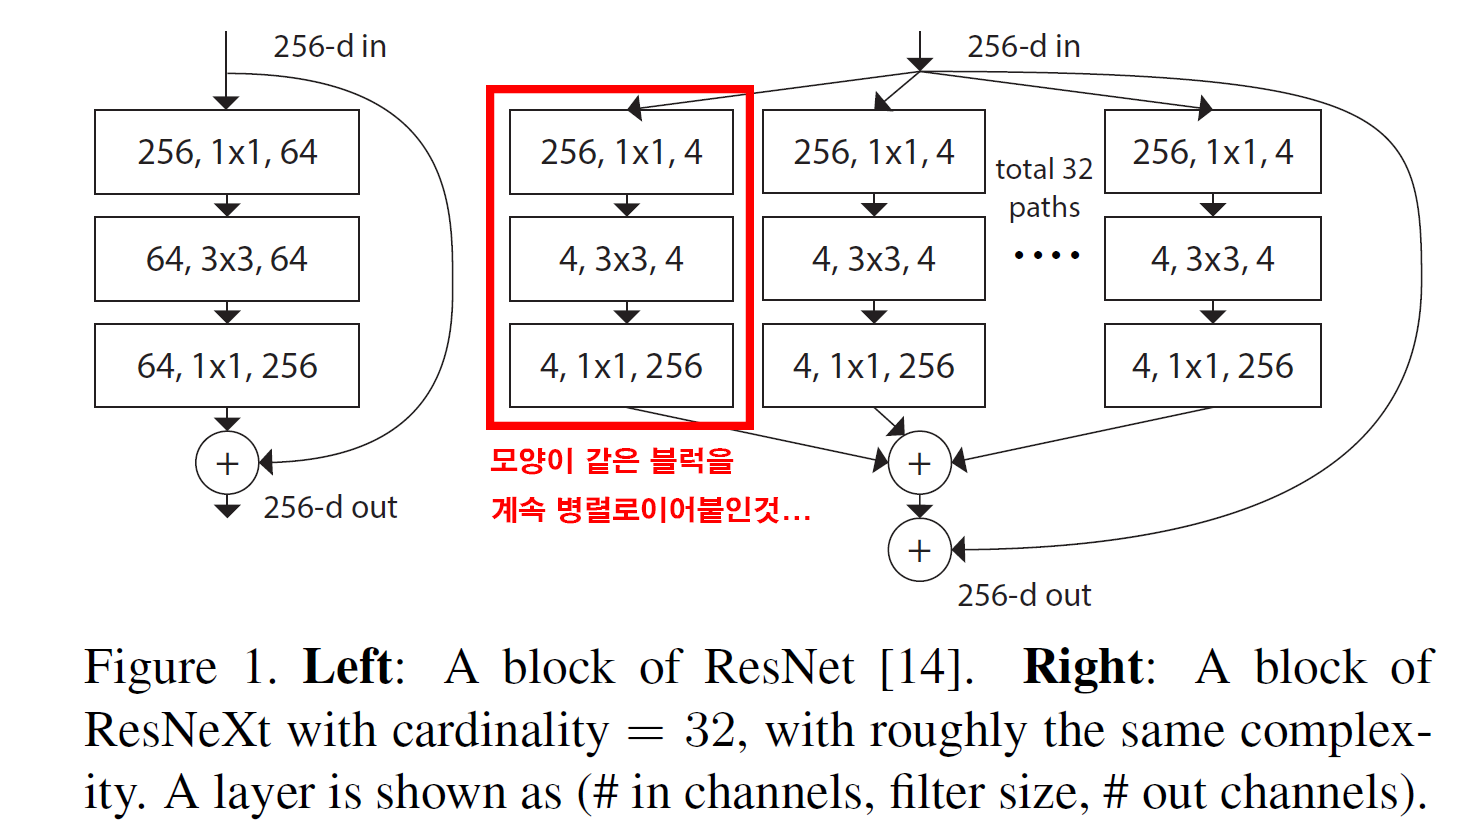

왼쪽 그림이 ResNet의 기본 블록인 Skip connection이 있는 기본 블럭인데

이 cardinality 방법이 도입된 ResNeXt는 왼쪽 기본블럭을 똑같이 복사해서 병렬로 붙여넣은걸 의미함

논문의 기여

이 논문의 이전 논문에 속하는 WRN(Wide residual Network)는 모델의 </br>
width(채널 개수임)을 증가시켜서 성능을 향상시킴</br>
-> ResNeXt는 width보다는 cardinality(블록을 병렬로 붙인 개수)를 늘이는게 더 효율적이라 말함</br>
-> 이 효율적의 이미는 **'동일 파라미터 대비 더 높은 성능'**을 의미함

## 3. Method
<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <img src="./img/02.png" alt="image" style="max-width: 100%; height: 60%;">
    </div>
    <div style="flex: 1; padding-left: 10px;">
        옆의 그림처럼 ResNet-50과 ResNeXt-50을 비교하자면</br>
        </br>
        병렬로 묶인 그룹(Cardinality)가 ResNeXt-50는 32개 있는건데</br>
        </br>
        FLOPs 측면에서 계산 복잡성이 모든 블록에 대해 거의 동일 하다는 장점이 있음</br>
        </br>
        -> 그러니까 연산량은 동일한데 정확도는 더 높게 나온다? </br>파라미터 개수도 큰 차이없다. 이런말임</br>
        아래 표를 보면 실제로 성능이 좀 더 좋게 나옴
        <img src="./img/04.png" alt="image2" style="max-width: 100%; height: 60%;">
    </div>
</div>

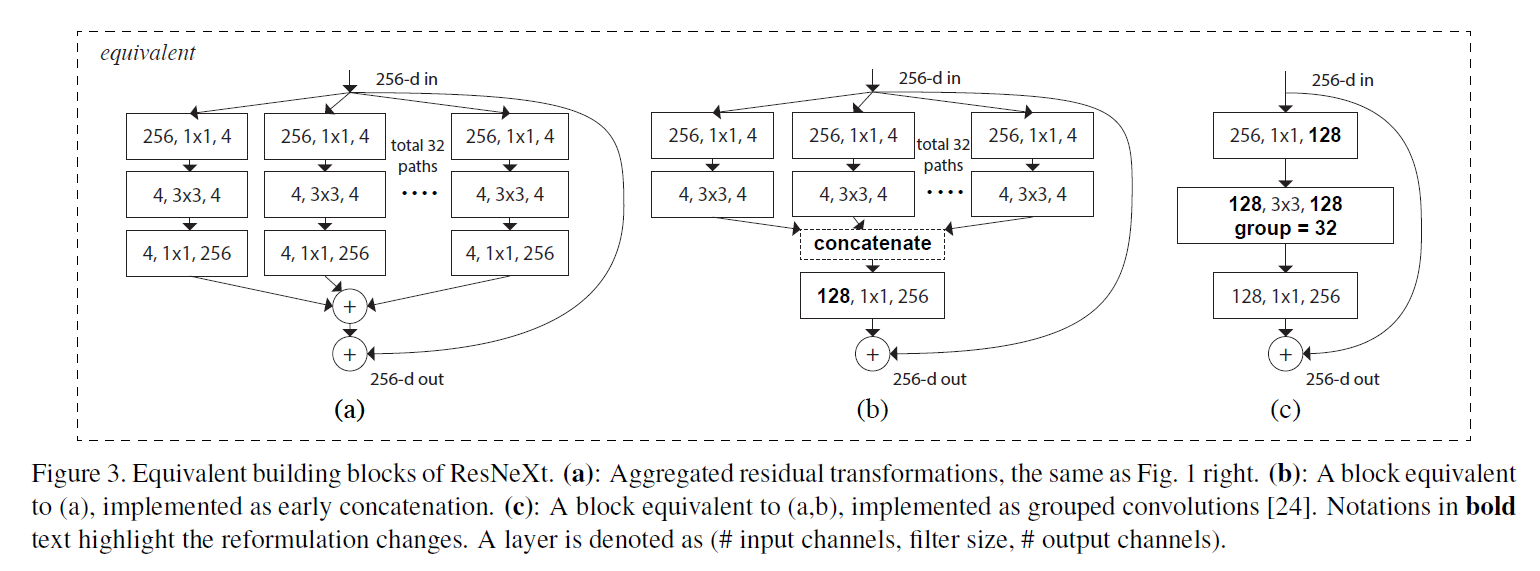
그래서 아까 앞전에서 설명한 ResNeXt의 기본 블록도인(a)는 그림 그리기가 복잡하니 (c)로 요약해서 설명하겠음</br>
(a), (b), (c)는 모두 같은 그림임 -> 논문의 저자가 정말 친절하게도 자기 첫 그림이 복잡하니 요약해서 그리는 법까지 알려줌</br>
진짜 눈물이 다나네 ㅋㅋㅋㅋㅋ

## 실험 결과

### 1. Increasing Cardinality vs Deeper/Wider

<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <img src="./img/05.png" alt="image" style="max-width: 100%; height: 60%;">
    </div>
    <div style="flex: 1; padding-left: 10px;">
        실험을 추가로 진행했을 때 Deep을 높인 ResNet-200보다 </br></br>
        Width성능을 높인 ResNet-101이 더 성능이 좋았고 </br></br>
        Cardinality 성능을 높인 ResNeXt-101이 성능이 더 좋음
    </div>
</div>


<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <img src="./img/05.png" alt="image" style="max-width: 100%; height: 60%;">
    </div>
    <div style="flex: 1; padding-left: 10px;">
        가장 마지막에 제안하는 건 ResNeXt-101 </br></br>
        이걸 실험해보자
    </div>
</div>

## ResNeXt의 bottleneck 모듈 먼저 만들기
-> ResNeXt의 기본 모듈인 Bottleneck 모듈을 먼저 설계하기
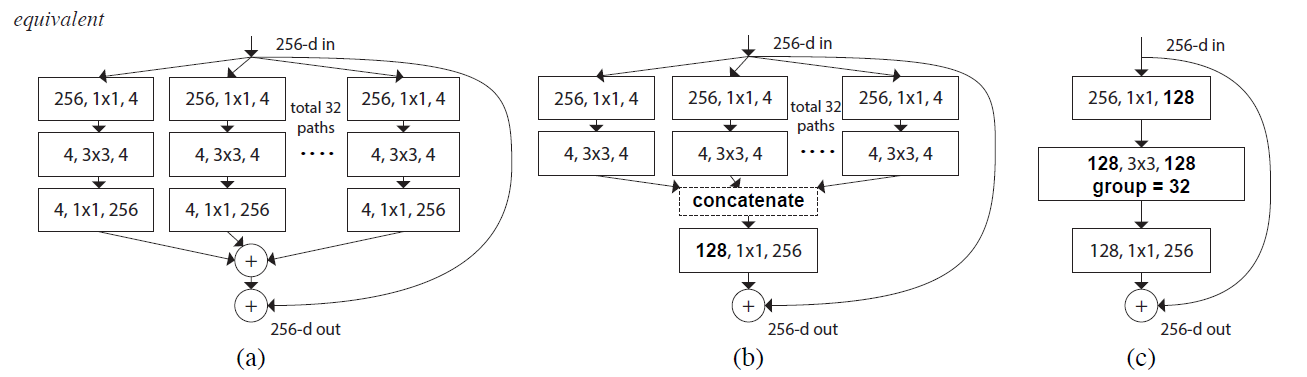</br>
a, b, c 같은 표현을 자세하게/간략하게 한 차이일뿐이다...

In [1]:
import torch
import torch.nn as nn

In [2]:
class Bottleneck(nn.Module):
    expansion = 4 #bottleneck 블록애서 체널 수를 확장하는 비율 -> 일반적으로 4

    def __init__(self, in_channels, planes, cardinality, base_width, stride=1, downsample=None):
        super(Bottleneck, self).__init__()

        # planes : bottleneck 블록의 출력 채널 수 
        D = planes * base_width // 64 #각 그룹의 채널 수
        C = cardinality #ResNeXt의 주요 인자
        #D * C가 => inner_channels가 된다.

        self.conv1 = nn.Conv2d(in_channels, D * C, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(D * C)
        self.conv2 = nn.Conv2d(D * C, D * C, kernel_size=3, stride=stride,
                               padding=1, groups=C, bias=False)
        self.bn2 = nn.BatchNorm2d(D * C)
        self.conv3 = nn.Conv2d(D * C, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


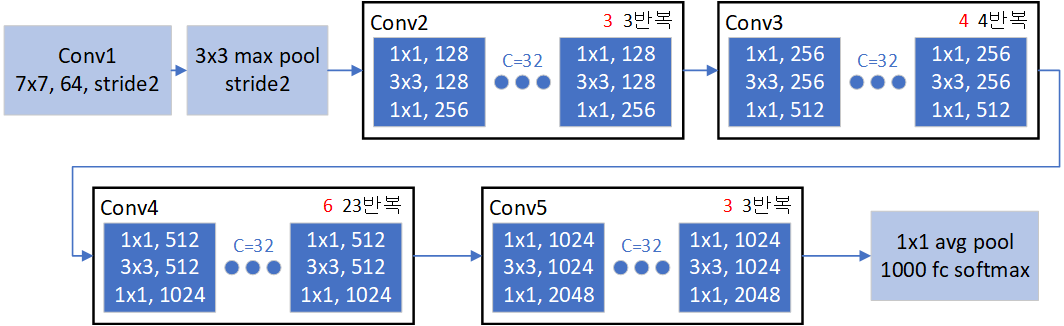</br>
ResNeXt 이 구조를 만들면됨</br>
참고로 50은 빨간색 반복, 101은 검정색 반복임</br>

In [3]:
class ResNeXt(nn.Module):

    def __init__(self, block, layers, cardinality=64, base_width=4, num_classes=1000):
        super(ResNeXt, self).__init__()
        self.inplanes = 64
        self.cardinality = cardinality
        self.base_width = base_width

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.conv2 = self._make_layer(block, 64, layers[0])
        self.conv3 = self._make_layer(block, 128, layers[1], stride=2)
        self.conv4 = self._make_layer(block, 256, layers[2], stride=2)
        self.conv5 = self._make_layer(block, 512, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, self.cardinality, self.base_width, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, self.cardinality, self.base_width))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [4]:
def ResNeXt50(num_classes=1000):
    return ResNeXt(Bottleneck, [3, 4, 6, 3], 
                   cardinality = 32, base_width=4, num_classes=num_classes)

def ResNeXt101(num_classes=1000):
    return ResNeXt(Bottleneck, [3, 4, 23, 3], 
                   cardinality = 32, base_width=4, num_classes=num_classes)

In [5]:
#모델이 잘 설계되었는지 검증하는 부분
from torchsummary import summary #설계한 모델의 요약본 출력 모듈

debug_model = ResNeXt50()
summary(debug_model, input_size=(3,224,224), device='cpu')
debug_model2 = ResNeXt101()
summary(debug_model2, input_size=(3,224,224), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 56, 56]           8,192
       BatchNorm2d-6          [-1, 128, 56, 56]             256
              ReLU-7          [-1, 128, 56, 56]               0
            Conv2d-8          [-1, 128, 56, 56]           4,608
       BatchNorm2d-9          [-1, 128, 56, 56]             256
             ReLU-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          32,768
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

# 데이터셋 불러오기
CIFAR100을 사용

In [6]:
import torchvision #예제 이미지 데이터셋이 모여있는 모듈
from torchvision import datasets, transforms

train_raw_data = datasets.CIFAR100("rawdata", 
                                   train=True,
                                   download=True, 
                                   transform=transforms.ToTensor())
test_raw_data = datasets.CIFAR100("rawdata", 
                                   train=False,
                                   download=True, 
                                   transform=transforms.ToTensor())

# 학습 이미지 개수와 고유 라벨 개수 추출
num_train_images = len(train_raw_data)
unique_train_labels = len(set(train_raw_data.targets))

# 테스트 이미지 개수와 고유 라벨 개수 추출
num_test_images = len(test_raw_data)
unique_test_labels = len(set(test_raw_data.targets))

print(f"Training Images: {num_train_images}, Unique Labels: {unique_train_labels}")
print(f"Testing Images: {num_test_images}, Unique Labels: {unique_test_labels}")

Files already downloaded and verified
Files already downloaded and verified
Training Images: 50000, Unique Labels: 100
Testing Images: 10000, Unique Labels: 100


논문에서 사용한 데이터 전처리 및 데이터 증강기법</br>
-> 따로 언급되지 않음</br>
-> 그래서 11_WRN의 데이터 증강기법을 그대로 사용 (이미지 사이즈만 다르게 해서)

In [7]:
CIFAR_N_val = [[0.5071, 0.4867, 0.4408], [0.2675, 0.2565, 0.2761]]

train_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomResizedCrop(224),     # 랜덤 크롭 후 리사이즈 (이미지 224x224)
    transforms.RandomHorizontalFlip(),     # 랜덤 좌우 반전
    transforms.Normalize(mean=CIFAR_N_val[0], std=CIFAR_N_val[1])
    
])
test_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),            # 이미지 크기를 224x224로 변경
    transforms.Normalize(mean=CIFAR_N_val[0], std=CIFAR_N_val[1])
    #훈련데이터의 평균, 표준편차 입력
])

#설계한 데이터 증강 기법을 적용시키자...
train_raw_data.transform = train_transformation
test_raw_data.transform = test_transformation


train_loader = torch.utils.data.DataLoader(train_raw_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_raw_data, batch_size=128, shuffle=False)

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# CUDA가 사용 가능한 경우, 추가 정보 출력
if device.type == 'cuda':
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Capability: {torch.cuda.get_device_capability(0)}")
    print(f"Total Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")  # GB 단위로 변환
    print(f"Number of GPUs: {torch.cuda.device_count()}")

cuda
GPU Name: NVIDIA GeForce RTX 4090
GPU Capability: (8, 9)
Total Memory: 23.99 GB
Number of GPUs: 1


In [9]:
ex_model = ResNeXt101(num_classes=unique_train_labels)
ex_model.to(device)
summary(ex_model, input_size=(3, 224, 224), device='cuda') #WRN의 입력이미지는 32임

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 56, 56]           8,192
       BatchNorm2d-6          [-1, 128, 56, 56]             256
              ReLU-7          [-1, 128, 56, 56]               0
            Conv2d-8          [-1, 128, 56, 56]           4,608
       BatchNorm2d-9          [-1, 128, 56, 56]             256
             ReLU-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          32,768
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

# 옵티마이저, 손실함수 정의

논문에서는 언급되지 않음 -> 11_WRN을 그대로 쓴다.

In [10]:
from torch import optim

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# Adam 옵티마이저 정의
optimizer = optim.Adam(ex_model.parameters(), lr=0.001, weight_decay=0.0005)

# Learning rate 스케줄러 정의 (여기서는 CosineAnnealingLR을 사용)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

#여기서 CosineAnnealingLR -> Lr을 점진적으로 감소시키는 함수, 최대epoc를 200으로 잡고
#서서히 감소시킴

# 훈련함수, 검증함수 만들기

In [11]:
epoch_step = 10

from tqdm import tqdm #훈련 진행상황 체크

def model_train(model, data_loader, loss_fn, optimizer_fn, scheduler_fn, processing_device, epoch):
    model.train()  # 모델을 훈련 모드로 설정

    global epoch_step

    # loss와 accuracy를 계산하기 위한 임시 변수를 생성
    run_size, run_loss, correct = 0, 0, 0

    # 특정 에폭일 때만 tqdm 진행상황 바 생성
    if (epoch + 1) % epoch_step == 0 or epoch == 0:
        progress_bar = tqdm(data_loader)
    else:
        progress_bar = data_loader

    for image, label in progress_bar:
        # 입력된 데이터를 먼저 GPU로 이전하기
        image = image.to(processing_device)
        label = label.to(processing_device)

        # 전사 과정 수행
        output = model(image)
        loss = loss_fn(output, label)

        #backward과정 수행
        optimizer_fn.zero_grad()
        loss.backward()
        optimizer_fn.step()

        # 스케줄러 스텝
        scheduler_fn.step()

        #argmax = 주어진 차원에서 가장 큰 값을 가지는 요소의 인덱스를 반환
        pred = output.argmax(dim=1) #예측값의 idx출력
        correct += pred.eq(label).sum().item()

        #현재까지 수행한 loss값을 얻어냄
        run_loss += loss.item() * image.size(0)
        run_size += image.size(0)

        #tqdm bar에 추가 정보 기입
        if (epoch + 1) % epoch_step == 0 or epoch == 0:
            progress_bar.set_description('[Training] loss: ' +
                                         f'{run_loss / run_size:.4f}, accuracy: ' +
                                         f'{correct / run_size:.4f}')

    avg_accuracy = correct / len(data_loader.dataset)
    avg_loss = run_loss / len(data_loader.dataset)

    return avg_loss, avg_accuracy




def model_evaluate(model, data_loader, loss_fn, processing_device, epoch):
    model.eval()  # 모델을 평가 모드로 전환 -> dropout 기능이 꺼진다
    # batchnormalizetion 기능이 꺼진다.
    global epoch_step

    # gradient 업데이트를 방지해주자
    with torch.no_grad():

        # 여기서도 loss, accuracy 계산을 위한 임시 변수 선언
        run_loss, correct = 0, 0

        # 특정 에폭일 때만 tqdm 진행상황 바 생성
        if (epoch + 1) % epoch_step == 0 or epoch == 0:
            progress_bar = tqdm(data_loader)
        else:
            progress_bar = data_loader

        for image, label in progress_bar:  # 이때 사용되는 데이터는 평가용 데이터
            # 입력된 데이터를 먼저 GPU로 이전하기
            image = image.to(processing_device)
            label = label.to(processing_device)

            # 평가 결과를 도출하자
            output = model(image)
            pred = output.argmax(dim=1) #예측값의 idx출력

            # 모델의 평가 결과 도출 부분
            # 배치의 실제 크기에 맞추어 정확도와 손실을 계산
            correct += torch.sum(pred.eq(label)).item()
            run_loss += loss_fn(output, label).item() * image.size(0)

        accuracy = correct / len(data_loader.dataset)
        loss = run_loss / len(data_loader.dataset)

        return loss, accuracy

## 실행 및 결과 확인

In [12]:
# 학습과 검증 손실 및 정확도를 저장할 리스트
his_loss, his_accuracy = [], []
num_epoch = 150

for epoch in range(num_epoch):
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(ex_model, train_loader, 
                                        criterion, optimizer, scheduler, 
                                        device, epoch)

    # 검증 손실과 검증 정확도를 반환 받습니다.
    test_loss, test_acc = model_evaluate(ex_model, test_loader, 
                                         criterion, device, epoch)

    # 손실과 정확도를 리스트에 저장
    his_loss.append((train_loss, test_loss))
    his_accuracy.append((train_acc, test_acc))

    #epoch가 특정 배수일 때만 출력하기
    if (epoch + 1) % epoch_step == 0 or epoch == 0:
        print(f"epoch {epoch+1:03d}, Training loss: " + 
              f"{train_loss:.4f}, Training accuracy: {train_acc:.4f}")
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

  0%|          | 0/79 [00:15<?, ?it/s]


epoch 001, Training loss: 4.1785, Training accuracy: 0.0669
Test loss: 3.9730, Test accuracy: 0.0767


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 010, Training loss: 2.5607, Training accuracy: 0.3404
Test loss: 2.2167, Test accuracy: 0.4061


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 020, Training loss: 2.1013, Training accuracy: 0.4452
Test loss: 1.5891, Test accuracy: 0.5545


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 030, Training loss: 1.8779, Training accuracy: 0.4999
Test loss: 1.5035, Test accuracy: 0.5701


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 040, Training loss: 1.7580, Training accuracy: 0.5288
Test loss: 1.6580, Test accuracy: 0.5439


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 050, Training loss: 1.6687, Training accuracy: 0.5487
Test loss: 1.4642, Test accuracy: 0.5845


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 060, Training loss: 1.6229, Training accuracy: 0.5578
Test loss: 1.1812, Test accuracy: 0.6587


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 070, Training loss: 1.5535, Training accuracy: 0.5790
Test loss: 1.1663, Test accuracy: 0.6657


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 080, Training loss: 1.5036, Training accuracy: 0.5902
Test loss: 1.3677, Test accuracy: 0.6096


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 090, Training loss: 1.4789, Training accuracy: 0.5963
Test loss: 1.4353, Test accuracy: 0.5973


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 100, Training loss: 1.4466, Training accuracy: 0.6051
Test loss: 1.1653, Test accuracy: 0.6626


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 110, Training loss: 1.4300, Training accuracy: 0.6077
Test loss: 1.0836, Test accuracy: 0.6829


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 120, Training loss: 1.4029, Training accuracy: 0.6175
Test loss: 1.1453, Test accuracy: 0.6680


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 130, Training loss: 1.3812, Training accuracy: 0.6207
Test loss: 1.4706, Test accuracy: 0.5975


  0%|          | 0/79 [00:15<?, ?it/s]


epoch 140, Training loss: 1.3622, Training accuracy: 0.6301
Test loss: 1.2269, Test accuracy: 0.6510


  0%|          | 0/79 [00:15<?, ?it/s]

epoch 150, Training loss: 1.3541, Training accuracy: 0.6291
Test loss: 1.0358, Test accuracy: 0.7019


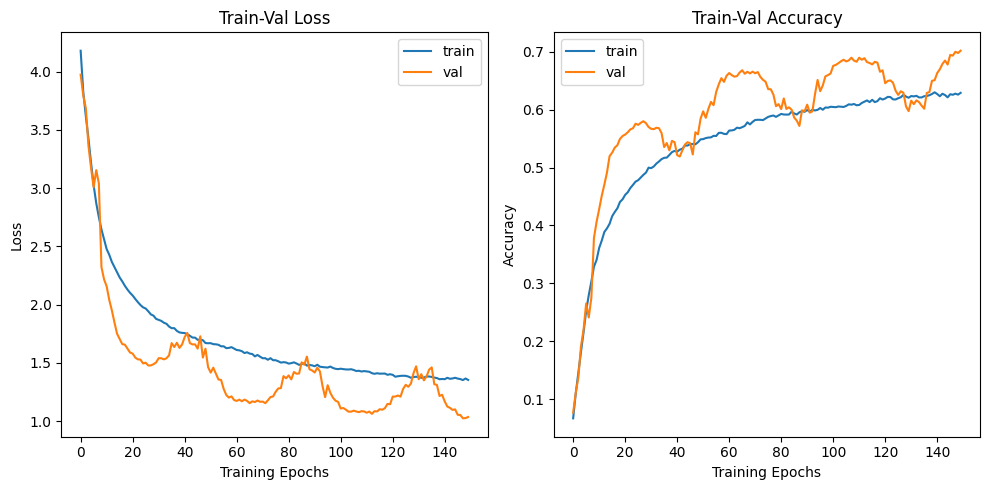

In [13]:
import matplotlib.pyplot as plt

# 손실 그래프
train_losses, val_losses = zip(*his_loss)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.xlabel('Training Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train-Val Loss')

# 정확도 그래프
train_accuracies, val_accuracies = zip(*his_accuracy)
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='train')
plt.plot(val_accuracies, label='val')
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train-Val Accuracy')

plt.tight_layout()
plt.show()

In [14]:
# 학습이 완료된 모델 저장
MODEL_NAME = 'ResNeXt101_cifar100'
torch.save(ex_model.state_dict(), f'{MODEL_NAME}.pth')

# 저장한 모델을 불러와서 최종 평가
ex_model.load_state_dict(torch.load(f'{MODEL_NAME}.pth'))
ex_model.to(device)

final_loss, final_acc = model_evaluate(ex_model, test_loader, criterion, device, 0)
print(f'evaluation loss: {final_loss:.5f}, evaluation accuracy: {final_acc:.5f}')

  0%|          | 0/79 [00:15<?, ?it/s]

evaluation loss: 1.03584, evaluation accuracy: 0.70190
